# Experiment week 2 - Logistic Regression with upsampling and using liblinear

In [2]:
# Import all necessary packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# read in training and test data
train = pd.read_csv("../data/raw/train (1).csv")
test = pd.read_csv("../data/raw/test (1).csv")

In [4]:
train.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [5]:
test.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,...,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,1899.000000,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,...,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,1096.821164,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,...,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,0.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,...,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,949.500000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,...,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,1899.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,...,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,2848.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,...,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,3798.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,...,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


In [6]:
scaler = StandardScaler()
print(scaler.fit_transform(train), end="\n\n----\n\n")
print(scaler.mean_)

[[ 0.93005882 -1.73183431  1.00610018 ... -0.05507101  0.47321012
   0.44674394]
 [-0.38091406 -1.7314013   0.71400493 ...  0.43214835  0.1966711
   0.44674394]
 [-0.28687803 -1.73096829  1.29819543 ... -0.05507101 -0.90948499
   0.44674394]
 ...
 [-0.33188458  1.73096829  1.29819543 ... -0.05507101  0.74974914
   0.44674394]
 [-1.39921865  1.7314013  -1.38908087 ...  0.06673383 -1.0477545
   0.44674394]
 [-0.99491401  1.73183431 -0.80489037 ... -0.66409522  0.1966711
   0.44674394]]

----

[6.85697100e+03 7.79850000e+03 6.27778750e+01 1.85766625e+01
 7.26708750e+00 2.80703750e+00 6.23121250e+00 4.46089000e+01
 2.64525000e-01 8.16562500e-01 1.95837000e+01 1.39252500e+00
 1.94778750e+00 7.13658250e+01 1.07783750e+00 2.16850000e+00
 3.24530000e+00 1.62451250e+00 6.48687500e-01 2.45212500e-01
 1.25776250e+00 8.33625000e-01]


In [7]:
from sklearn.utils import resample

# separate 1s and 0s

fiveyears = train[train.TARGET_5Yrs==1]
lessyears = train[train.TARGET_5Yrs==0]

# upsampling minority
lessyears_upsampled = resample(lessyears, replace=True, n_samples=len(fiveyears), random_state=123)

# combine fiveyears and lessyears_unsampled
up_sampling=pd.concat([fiveyears, lessyears_upsampled])

In [8]:
# check new class counts
up_sampling.TARGET_5Yrs.value_counts()

1    6669
0    6669
Name: TARGET_5Yrs, dtype: int64

In [9]:
# Create a target dataframe
target = up_sampling.pop("TARGET_5Yrs")

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(up_sampling, target, test_size=0.2, random_state=8)

In [12]:
# Instantiate LogisticRegression Class into reg
reg = LogisticRegression(solver='liblinear')

# fitting
reg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [13]:
# predictions probability
y_train_preds = reg.predict_proba(X_train)[:,1]
y_val_preds = reg.predict_proba(X_val)[:,1]

In [15]:
from sklearn.metrics import roc_auc_score

# AUROC scores
print('Train AUROC score:',roc_auc_score(y_train,y_train_preds))
print('Validation AUROC score:', roc_auc_score(y_val,y_val_preds))

Train AUROC score: 0.7067264357198266
Validation AUROC score: 0.704850434266602


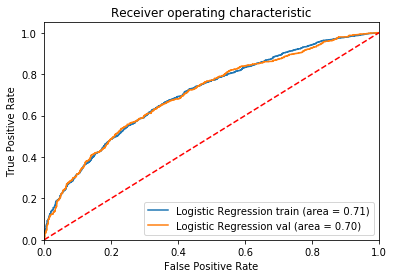

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_val, tpr_val, thresholds_test = roc_curve(y_val, y_val_preds)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_train_preds)
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression train (area = %0.2f)' % roc_auc_score(y_train,y_train_preds))
plt.plot(fpr_val, tpr_val, label='Logistic Regression val (area = %0.2f)' % roc_auc_score(y_val,y_val_preds))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()